<a href="https://colab.research.google.com/github/David-Zg/Numerical-methods/blob/main/Interpolaci%C3%B3n_de_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=6pt>Métodos Numéricos</font>
*Zevallos Garay, David Brandon*

## Interpolación de Lagrange
---

Hay varias formas de poder aproximar una función a varios puntos:
- Interpolación de Lagrange (Lo veremos en este capítulo).
- Series de potencias.
- Interpolación de Newton hacia atras y hacia adelante.

La fórmula de interpolación de Lagrange de orden $N$ se obtiene como

$$g(x) = \frac{(x - x_1)(x - x_2) \cdots (x - x_N)}{(x_0 - x_1)(_0 - x_2) \cdots (x_0 - x_N)} f_0 + \frac{(x - x_0)(x - x_2) \cdots (x - x_N)}{(x_1 - x_0)(x_1 - x_2) \cdots (x_1 - x_N)} f_1 + \cdots + \frac{(x - x_0)(x - x_1) \cdots (x - x_{N-1})}{(x_N - x_0)(x_N - x_1) \cdots (x_N - x_{N-1})} f_N$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<font size=5pt>Veamos un ejemplo</font>


In [2]:
# Creamos un diccionario
data = {"Temperatura": [94., 205., 371.],
        "Densidad": [929., 902., 860.]}

In [3]:
df = pd.DataFrame(data)
df.head()

,Temperatura,Densidad
0,94.0,929.0
1,205.0,902.0
2,371.0,860.0


In [4]:
X = df.Temperatura.values
Y = df.Densidad.values

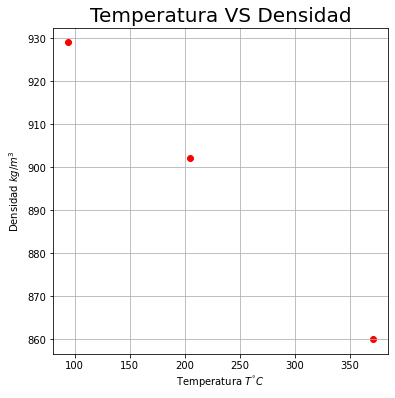

In [5]:
# Graficando los puntos
plt.figure(figsize = (6, 6))

plt.grid()
plt.scatter(X, Y, c="red")
plt.xlabel("Temperatura $T^°C$")
plt.ylabel("Densidad $kg/m^3$")
plt.title("Temperatura VS Densidad", fontsize = 20)
plt.show()

In [6]:
# Por partes
T = 251
g_T = ((T - X[1])*(T - X[2]))/((X[0] - X[1])*(X[0] - X[2])) * Y[0] +\
      ((T - X[0])*(T - X[2]))/((X[1] - X[0])*(X[1] - X[2])) * Y[1] +\
      ((T - X[0])*(T - X[1]))/((X[2] - X[0])*(X[2] - X[1])) * Y[2] 

In [7]:
g_T

890.5561165532459

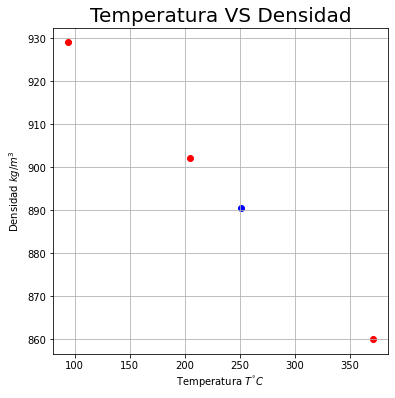

In [8]:
plt.figure(figsize = (6, 6))

plt.grid()
plt.scatter(X, Y, c="red")
plt.scatter(T, g_T, c = "blue")
plt.xlabel("Temperatura $T^°C$")
plt.ylabel("Densidad $kg/m^3$")
plt.title("Temperatura VS Densidad", fontsize = 20)
plt.show()

<font size=5pt, color="yellow">Probando hacer un código para el ejemplo</font>

In [9]:
df.head()

,Temperatura,Densidad
0,94.0,929.0
1,205.0,902.0
2,371.0,860.0


In [10]:
sum = 0
for i in range(len(df)):
  z = 1
  for j in range(len(df)):
    if (i != j):
      z = z * ((T - X[j])/(X[i] - X[j]))
  sum = (Y[i] * z) + sum
print(sum)

890.5561165532458


<font size=5pt, color="yellow">Generalizamos el código</font>

In [14]:
# La función consta de tres parámeetros
# x = Variables de entrada
# y = Valores de la función
# T = Valor "X" para la cual se quiere interpolar
def inter_lagrange(x , y, T):
  # Procesando data
  X = pd.DataFrame(x, columns = ["X"])
  Y = pd.DataFrame(y, columns = ["Y"])
  df = pd.concat([X, Y], axis=1)
  #Convirtiendo a array de numpy
  X = df.X.values
  Y = df.Y.values

  #definiendo la interpolación
  sum = 0
  for i in range(len(df)):
    z = 1
    for j in range(len(df)):
      if (i != j):
        z = z * ((T - X[j])/(X[i] - X[j]))
    sum = (Y[i] * z) + sum

# Creando la gráfica
  plt.figure(figsize=(7, 7))
  plt.scatter(X, Y, c = "green")
  plt.scatter(T, sum, c = "blue")
  plt.grid()
  plt.title("Interpolación de Lagrange", fontsize = 20)
  plt.xlabel("x")
  plt.ylabel("y = $f(x)$")

  plt.show()

  print("\n\n La iterpolación para \n X = %s" % T + " \n es \n Y = %s"  % round(sum, 3))

In [12]:
# Data de prueba
x = [94, 205, 371]
y = [929, 902, 860]

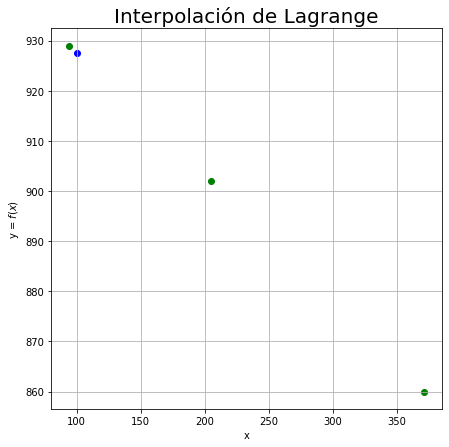



 La iterpolación para 
 X = 100 
 es 
 Y = 927.563


In [15]:
inter_lagrange(x, y, 100)